# Cravat anlysis for testset

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from sklearn.metrics import roc_curve, roc_auc_score

In [166]:
df = pd.read_excel("test_set.vcf.CRAVAT_analysis.xls",skiprows=10,header=1)
df_actual=pd.read_csv("test_set.csv")


In [167]:
frames = pd.concat([df['ID'],df['Chromosome'],df['Position'],df['Strand'],
                   df['Reference base(s)'],df['Alternate base(s)'],
                   df['ClinVar'],df['VEST p-value'].rename('P_value'),df['VEST FDR']], axis=1)

df_actual=pd.concat([df_actual['GenomicCoordinate'].rename('ID'),df_actual['Pathogenicity'].rename('Pathogenicity')],axis=1)

In [168]:
df_actual
frames=pd.merge(frames, df_actual, how='inner', on='ID')
frames
frames.loc[(frames.Pathogenicity=='Likely_benign'),'Pathogenicity']= 'Benign'
frames.loc[(frames.Pathogenicity=='Likely_pathogenic'),'Pathogenicity']= 'Pathogenic'

In [169]:
temp = list('B'*len(frames))
frames.insert(9, column='Predicted', value=temp)

In [170]:
frames.loc[(frames.P_value>=.09), 'Predicted']= 'Pathogenic'
frames.loc[(frames.P_value<.09), 'Predicted']= 'Benign'


In [171]:


frames.to_excel("Cravat_ful.xls")


In [172]:
fn=frames.loc[(frames.Predicted.astype(str)=='Benign')&(frames.Pathogenicity.astype(str)=='Pathogenic')]
fp=frames.loc[(frames.Predicted.astype(str)=='Pathogenic')&(frames.Pathogenicity.astype(str)=='Benign')]

false_df=pd.concat([fn,fp],axis=0)
false_df=false_df.dropna()

false_df.to_excel("Cravat_false.xls")

# Box Plot

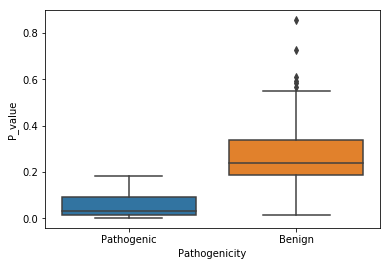

In [173]:
sns.boxplot(x='Pathogenicity',y='P_value',data=frames)

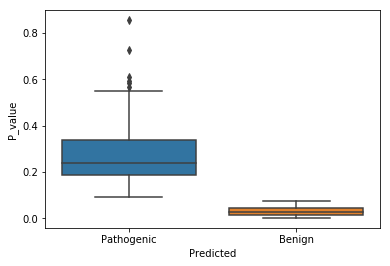

In [174]:
sns.boxplot(x='Predicted',y='P_value',data=frames,order=["Pathogenic","Benign"] )

In [175]:
fpr, tpr, thr = roc_curve(frames.Predicted,frames.P_value,pos_label="Pathogenic")

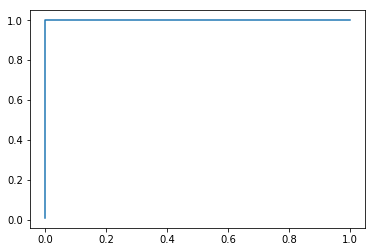

In [176]:
plt.plot(fpr, tpr)


### Area under curve

In [177]:
y_true = np.ones(len(frames.Pathogenicity))
y_true[frames.Pathogenicity == 'Benign'] = 0
roc_auc_score(y_true,frames.P_value)

0.0635593220338983